All three tutorials are jupyter notebooks, and therefore in order to be able to run the code, you have to install that beforehand.
<br>

Follow the instructions here https://jupyter.org/install to install jupyter notebook. If you are a Windows user, you can also follow the instructions here https://www.geeksforgeeks.org/how-to-install-jupyter-notebook-in-windows/ (Using Anaconda is recommended).



Now you have jupyter notebook installed, run it and open this file. The goal of this part is to familiarize you with some basic Python syntax. Please note that we would not teach Python in our live tutorials and we assume that everyone has a basic knowledge of python. 

Here we would go through some of the most common python instructions we would use in our live tutorials.


###### what is python library?

Python library is a collection of modules that allows you to perform lots of actions without writing your own code. For example, when you are working with data, numpy, sklearn, pandas, etc. are the most commonly used libraries that facilitates functions such as reading data from file, performing various operations on data, ..


###### Pandas
Before using a library module, we have to 'import' it to our python program. For example, here we import 'pandas' module which is for data manipulation and analysis.

In [1]:
import pandas as pd

here, we use it to read data files by passing the address of the file, which is called dataframe:

In [2]:
df = pd.read_csv('./preprocessing/sample_raw_data/sample.csv')

let's take a look at the dataframe df by showing its first 10 rows:

In [3]:
df.head(10)

,id,author,body
0,1,author1,"So we beat on, boats against the current, born..."
1,2,author1,He turned out the light and went into Jem's ro...
2,3,author1,The eyes and faces all turned themselves towar...
3,4,author2,"The creatures outside looked from pig to man, ..."
4,5,author2,Very few castaways can claim to have survived ...
5,6,author2,"But wherever they go, and whatever happens to ..."
6,7,author2,"Whatever our struggles and triumphs, however w..."
7,8,author2,Message deleted
8,9,author3,Message withdrawn at poster's request.
9,10,[deleted],"In the meantime, she would just live."


print shape of the dataframe and its list of features:

In [4]:
print(df.shape)
print(list(df))


(11, 3)
['id', 'author', 'body']


selecting a specific column of our dataframe:

In [5]:
df['body']

0     So we beat on, boats against the current, born...
1     He turned out the light and went into Jem's ro...
2     The eyes and faces all turned themselves towar...
3     The creatures outside looked from pig to man, ...
4     Very few castaways can claim to have survived ...
5     But wherever they go, and whatever happens to ...
6     Whatever our struggles and triumphs, however w...
7                                       Message deleted
8                Message withdrawn at poster's request.
9                 In the meantime, she would just live.
10                                He loved Big Brother.
Name: body, dtype: object

<br>

###### some basic operations

here we go thorugh some of the basic python operations, such as loop , and if else statement.

<br>
The for loop in Python is used to iterate over a sequence (list, tuple, string) or other iterable objects.

In [6]:
slist = [1, 4, 7, 3, 2]
for item in slist:
    print(item)

1
4
7
3
2


An if else Python statement evaluates whether an expression is true or false. If a condition is true, the “if” statement executes. Otherwise, the “else” statement executes:

In [7]:
for item in slist:
    if item > 3:
        print(item)
    else:
        print('Failed')

Failed
4
7
Failed
Failed


<br>

###### function
A function is a block of code that is used to perform a single or several actions. It only runs when it is called. You can pass data, known as parameters, into a function.

For example, here we define a function to print the 'body' of each row of our dataframe:

In [8]:
def printbody(df):
    for i, row in df.iterrows():
        print(row['body'])

In [9]:
printbody(df)

So we beat on, boats against the current, borne back ceaselessly into the past
He turned out the light and went into Jem's room. He would be there all night, and he would be there when Jem waked up in the morning
The eyes and faces all turned themselves towards me, and guiding myself by them, as by a magical thread, I stepped into the room
The creatures outside looked from pig to man, and from man to pig, and from pig to man again; but already it was impossible to say which was which.
Very few castaways can claim to have survived so long at sea as Mr. Patel, and none in the company of an adult Bengal tiger.
But wherever they go, and whatever happens to them on the way, in that enchanted place on the top of the Forest a little boy and his Bear will always be playing.
Whatever our struggles and triumphs, however we may suffer them, all too soon they bleed into a wash, just like watery ink on paper.
Message deleted
Message withdrawn at poster's request.
In the meantime, she would just liv

<br>

###### Logistic Regression
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. Mathematically, a logistic regression model predicts P(Y=1) as a function of X (Y is the depandant variable which could be 0 or 1, and X is a set of independant variables). It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.


Here, we provide you an example of how to use logistic regression to model your data. This sample contains 120 data points which each has two independant variables x1 and x2 (or input variables) and dependant variable y (or outcome variable). The goal of to use the data points to create a predictive model of the outcome variable.


<br>

First, read the data file:

In [10]:
df = pd.read_csv('./data/lgr_sample.csv')

as an optional step, we plot our data ponits to get a betterunderestanding of our data.

In [11]:

import matplotlib.pyplot as plt
import numpy as np


x_1 = df.loc[df.y==0][['x1', 'x2']].to_numpy()
x_2 = df.loc[df.y==1][['x1', 'x2']].to_numpy()


# plotting points with diff color for diff label
plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='b', label='y = 0')
plt.scatter([x_2[:, 0]], [x_2[:, 1]], c='r', label='y = 1')



plt.xlabel("x1",fontsize=15)
plt.ylabel("x2",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

Then, we split our data into train and test sets, where we train the model using the train set and further test the model using the test set.

In [12]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import plot_roc_curve


X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# training the logistic regression model
model = LogisticRegression(random_state=0).fit(X_train, y_train)

To get a better underestanding of how logistic regression modeled our data, we plot the data points along with the decision boundary of our trained model.

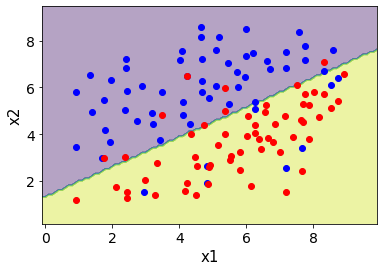

In [13]:
# Plot the decision boundary. For that, we will assign a color to each

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


# Meshgrid creation
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh using the model.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predictions to obtain the classification results
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='b', label='y = 0')
plt.scatter([x_2[:, 0]], [x_2[:, 1]], c='r', label='y = 1')


plt.xlabel("x1",fontsize=15)
plt.ylabel("x2",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

predicting the label (y) of the test data points:

In [14]:
y_pred = model.predict(X_test)
print('actual labels of the test samples:%s'%y_test)
print('predicted labels for the test samples:%s'%y_pred)

actual labels of the test samples:[1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 0 1 1]
predicted labels for the test samples:[1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 1]


calculating the accuracy and AUC of our model on test set:

In [15]:
acc = accuracy_score(y_test, y_pred)

s = model.decision_function(X_test)
auc = roc_auc_score(y_test, s)

print('test accuracy:{}'.format(acc), 'test AUC :{}'.format(auc))

test accuracy:0.9 test AUC :0.9823232323232324


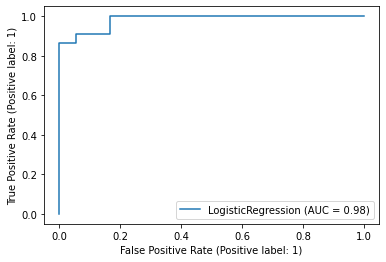

In [16]:
plot_roc_curve(model, X_test, y_test)
plt.show()